In [1]:
import marimo as mo

In [40]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# imputer (Missing Data Handling)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFECV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import (classification_report, roc_curve, roc_auc_score,
                             confusion_matrix, accuracy_score, f1_score, precision_score, 
                             recall_score)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import auc

import shap

/home/omarf/Project/ABO3_Perovskites_Classification/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# os
import os

In [4]:
# Pd Display
def pdisplay(df):
    if not isinstance(df, pd.DataFrame):
        return pd.DataFrame(df)
    else:
        return df

# Import Data

In [5]:
train_df_path = mo.notebook_location() /'..' / 'Data' / 'Supplementary Information File 1 (SIF-1).xlsx'
test_df_path = mo.notebook_location() /'..'/ 'Data'/ 'Supplementary Information File 2 (SIF-2).xlsx'

In [6]:
train_df = pd.read_excel(train_df_path)
test_df = pd.read_excel(test_df_path)

In [7]:
train_df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1,Ac2O3,Ac,Ac,False,cubic,element not in BV,element not in BV,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000
1,2,AcAgO3,Ac,Ag,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571
2,3,AcAlO3,Ac,Al,False,cubic,element not in BV,element not in BV,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714
3,4,AcAsO3,Ac,As,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429
4,5,AcAuO3,Ac,Au,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286


In [8]:
test_df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,81,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
1,107,AgMoO3,Ag,Mo,False,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,4.126280,0.435714
2,109,AgNbO3,Ag,Nb,True,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,4.072890,0.457143
3,122,AgReO3,Ag,Re,False,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,4.201732,0.414286
4,125,AgSbO3,Ag,Sb,True,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,4.148925,0.428571


# Data Analysis

In [9]:
train_df.dtypes

S.No                   int64
Compound              object
A                     object
B                     object
In literature           bool
Lowest distortion     object
v(A)                  object
v(B)                  object
r(AXII)(Å)           float64
r(AVI)(Å)            float64
r(BVI)(Å)            float64
EN(A)                float64
EN(B)                float64
l(A-O)(Å)            float64
l(B-O)(Å)            float64
ΔENR                 float64
tG                   float64
τ                     object
μ                    float64
dtype: object

In [10]:
train_df['Lowest distortion'].value_counts()

Lowest distortion
cubic           3253
orthorhombic    1573
rhombohedral     323
tetragonal       127
-                 53
Name: count, dtype: int64

In [11]:
# no_ld_idx = train_df['Lowest distortion'] == '-'
# train_df[no_ld_idx].shape[0]

- 53 values are not specified in lowest distortion.
- they are replaced by `-`

In [12]:
train_df['v(A)'].value_counts()

v(A)
not balanced         1881
element not in BV    1233
3                     935
2                     884
1                     222
4                     146
5                      28
Name: count, dtype: int64

In [13]:
# vA_idx = train_df['v(A)']
# no_vA_idx = (vA_idx == 'not balanced') | (vA_idx == 'element not in BV')
# mo.md(f"Unavailable v(A) - {train_df[no_vA_idx].shape[0]}")


In [14]:
# # not (no_Lowest_distion) and (no_vA_idx)
# only_no_vA_idx = ~(no_ld_idx) & no_vA_idx
# train_df[only_no_vA_idx].shape[0]

- total unavailable data 3063

In [15]:
train_df['τ'].value_counts

<bound method IndexOpsMixin.value_counts of 0              -
1              -
2              -
3              -
4              -
          ...   
5324    5.228952
5325           -
5326           -
5327           -
5328           -
Name: τ, Length: 5329, dtype: object>

In [16]:
train_df.isnull().sum()

S.No                 0
Compound             0
A                    0
B                    0
In literature        0
Lowest distortion    0
v(A)                 0
v(B)                 0
r(AXII)(Å)           0
r(AVI)(Å)            0
r(BVI)(Å)            0
EN(A)                0
EN(B)                0
l(A-O)(Å)            0
l(B-O)(Å)            0
ΔENR                 0
tG                   0
τ                    0
μ                    0
dtype: int64

In [17]:
train_df.describe()

,S.No,r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,μ
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,2665.000000,0.974656,0.825617,0.817845,1.572466,1.572466,2.289800,2.012587,-2.199993,0.766090,0.584176
std,1538.494123,0.337139,0.245000,0.247480,0.449248,0.449248,0.664239,0.598509,0.668465,0.136280,0.176770
min,1.000000,0.270000,0.270000,0.270000,0.790000,0.790000,0.000000,0.000000,-5.411536,0.384648,0.192857
25%,1333.000000,0.690000,0.630000,0.630000,1.200000,1.200000,2.290644,1.956808,-2.604821,0.668537,0.450000
50%,2665.000000,0.930000,0.800000,0.770000,1.550000,1.550000,2.393444,2.096141,-2.101179,0.756440,0.550000
75%,3997.000000,1.180000,0.950000,0.950000,1.930000,1.930000,2.571812,2.286435,-1.711500,0.850628,0.678571
max,5329.000000,1.880000,1.670000,1.670000,2.540000,2.540000,3.300176,3.009747,-0.601714,1.388809,1.192857


In [18]:
train_df.describe(include=['O'])

,Compound,A,B,Lowest distortion,v(A),v(B),τ
count,5329,5329,5329,5329,5329,5329,5329
unique,5329,73,73,5,7,7,1608
top,Ac2O3,Ac,Ac,cubic,not balanced,not balanced,-
freq,1,73,73,3253,1881,1881,3143


# Missing Data Handling

In [19]:
train_df.columns

Index(['S.No', 'Compound', 'A', 'B', 'In literature', 'Lowest distortion',
       'v(A)', 'v(B)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)', 'EN(A)',
       'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ'],
      dtype='object')

In [20]:
no_ld_idx = train_df['Lowest distortion'] != '-'

vA_idx = train_df['v(A)']
no_vA_idx = (vA_idx != 'not balanced') & (vA_idx != 'element not in BV')

no_T_idx = train_df['τ'] != '-'

tG_idx = train_df['tG']
no_tG_idx = (0.82 < tG_idx) & (tG_idx < 1.10)

u_idx = train_df['μ']
no_u_idx = (0.414 < u_idx) & (u_idx < 0.732)

final_idx = no_ld_idx & no_vA_idx & no_T_idx & no_tG_idx & no_u_idx
train_df[final_idx]

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
81,82,AgBiO3,Ag,Bi,False,rhombohedral,1,5,1.28,0.95,0.76,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857
107,108,AgMoO3,Ag,Mo,False,cubic,1,5,1.28,0.95,0.61,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,4.12628,0.435714
109,110,AgNbO3,Ag,Nb,True,rhombohedral,1,5,1.28,0.95,0.64,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,4.07289,0.457143
122,123,AgReO3,Ag,Re,False,cubic,1,5,1.28,0.95,0.58,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,4.201732,0.414286
125,126,AgSbO3,Ag,Sb,True,orthorhombic,1,5,1.28,0.95,0.60,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,4.148925,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,5174,YbTiO3,Yb,Ti,True,orthorhombic,2,4,1.14,0.95,0.61,1.10,1.54,2.519261,1.927849,-2.032786,0.893558,4.272306,0.435714
5177,5178,YbVO3,Yb,V,True,orthorhombic,2,4,1.14,0.95,0.58,1.10,1.63,2.519261,1.758039,-1.934214,0.907097,4.231037,0.414286
5178,5179,YbWO3,Yb,W,False,orthorhombic,2,4,1.14,0.95,0.66,1.10,2.36,2.519261,1.745600,-1.802143,0.871870,4.441924,0.471429
5182,5183,YbZrO3,Yb,Zr,False,orthorhombic,2,4,1.14,0.95,0.72,1.10,1.33,2.519261,2.043778,-2.345357,0.847194,4.835508,0.514286


In [21]:
vA = train_df[final_idx]['v(A)']
feature_drop = ["S.No" , "Compound", "A", "B", "In literature", "v(B)", 'r(BVI)(Å)']
train_df_final = train_df[final_idx].drop(feature_drop, axis=1)

# T
train_df_final['τ'] = train_df_final['τ'].apply(pd.to_numeric, errors="coerce")

# One Hot Encoding
train_df_final = train_df_final.drop(['v(A)'], axis=1)
train_df_final['v(A)_1'] = vA == 1
train_df_final['v(A)_2'] = vA == 2
train_df_final['v(A)_3'] = vA == 3

# Label encoding
ld = train_df_final['Lowest distortion']
# train_df_final = train_df_final.drop(['Lowest distortion'], axis=1)
# create a LabelEncoder instance
le = LabelEncoder()
# fit and transform the 'A' column
train_df_final['Lowest distortion'] = le.fit_transform(train_df_final['Lowest distortion'])



train_df_final

,Lowest distortion,r(AXII)(Å),r(AVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,v(A)_1,v(A)_2,v(A)_3
81,2,1.28,0.95,1.93,2.02,2.761453,2.215655,-1.992714,0.877336,4.072914,0.542857,True,False,False
107,0,1.28,0.95,1.93,2.16,2.761453,1.789300,-1.663536,0.942809,4.126280,0.435714,True,False,False
109,2,1.28,0.95,1.93,1.60,2.761453,1.955055,-1.972571,0.928944,4.072890,0.457143,True,False,False
122,0,1.28,0.95,1.93,1.90,2.761453,1.987971,-1.729357,0.957094,4.201732,0.414286,True,False,False
125,1,1.28,0.95,1.93,2.05,2.761453,2.075849,-1.696143,0.947523,4.148925,0.428571,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5173,1,1.14,0.95,1.10,1.54,2.519261,1.927849,-2.032786,0.893558,4.272306,0.435714,False,True,False
5177,1,1.14,0.95,1.10,1.63,2.519261,1.758039,-1.934214,0.907097,4.231037,0.414286,False,True,False
5178,1,1.14,0.95,1.10,2.36,2.519261,1.745600,-1.802143,0.871870,4.441924,0.471429,False,True,False
5182,1,1.14,0.95,1.10,1.33,2.519261,2.043778,-2.345357,0.847194,4.835508,0.514286,False,True,False


<Axes: >

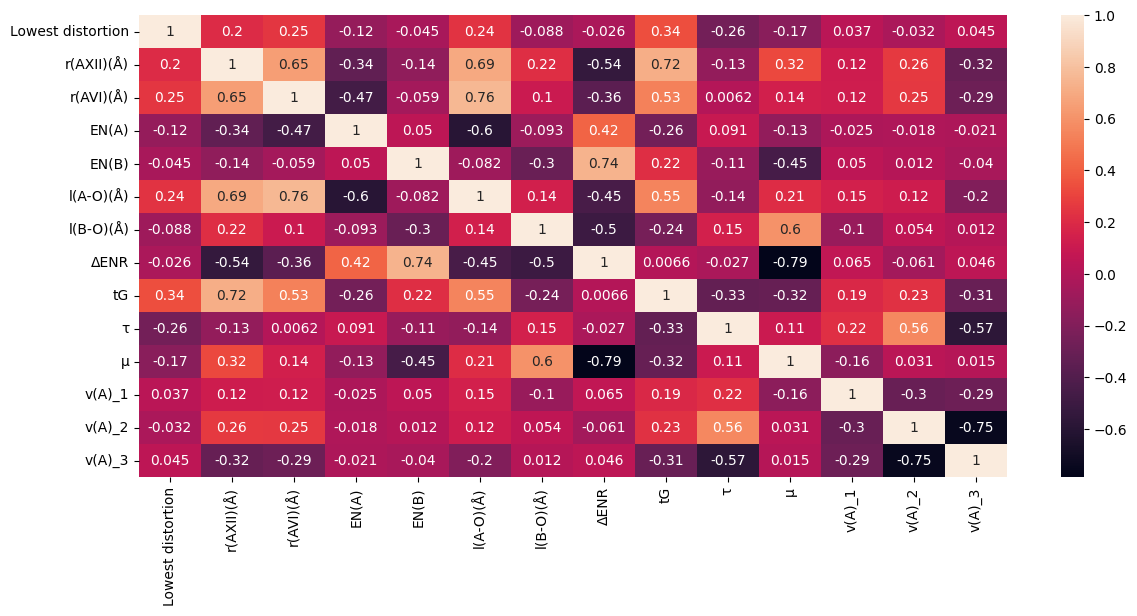

In [22]:
_corr = train_df_final.corr(method="spearman")
plt.figure(figsize=(14,6))
sns.heatmap(_corr, annot=True)

# Model Train

In [23]:
X = train_df_final.drop(['Lowest distortion'], axis=1)
y = train_df_final['Lowest distortion']
smote = SMOTE(random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=100)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [32]:

from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score

# Define the hyperparameters

# Create a 5-fold cross-validation object
cv = 5

# Create a LightGBM classifier
# clf = lgb.LGBMClassifier(**params)

lgbm = LGBMClassifier(
    # force_col_wise=True,
    objective="multiclass", 
    n_estimators=250, 
    learning_rate=0.01
)
lgbm.fit(X_train, y_train )

y_pred = lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2542
[LightGBM] [Info] Number of data points in the train set: 968, number of used features: 13
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted labels', ylabel='Actual labels'>

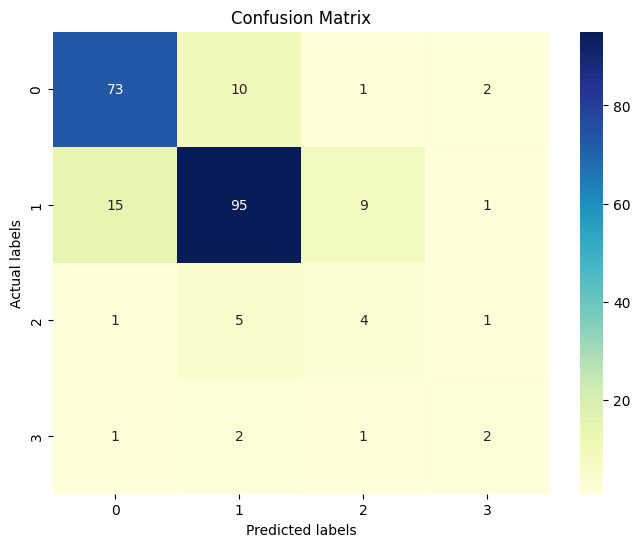

In [33]:
# from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.gca()

In [ ]:
sk = StratifiedKFold(shuffle = True, random_state = 100, n_splits= 5)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    # ('smote' , SMOTE(random_state=42) ),
    ('LightGBM', lgbm)
])

result = cross_validate(pipe, X, y, cv = sk, n_jobs= -1)
scores_cv:np.array = pd.DataFrame(result)['test_score'].values


In [35]:
_result = [
    {'Accurecy': scores_cv.mean().round(4)*100,
    'SD': scores_cv.std().round(3) },
]
pd.DataFrame(_result)

,Accurecy,SD
0,80.44,0.032


In [36]:
def classification_report_to_dataframe(y_true, y_pred, class_names=None, digits=2, title="Classification Report", title_level=1):
    """
    Convert scikit-learn classification report to pandas DataFrame

    Parameters:
    y_true (array): True labels
    y_pred (array): Predicted labels
    class_names (list): List of class names in order
    digits (int): Number of decimal places for metrics

    Returns:
    tuple: (metrics_df, summary_df) - Metrics by class and summary statistics
    """
    # Generate raw classification report dictionary
    report_dict = classification_report(
        y_true, y_pred, 
        target_names=class_names,
        output_dict=True,
        digits=digits
    )

    # Extract class-wise metrics and support
    metrics_df = pd.DataFrame(report_dict).transpose().reset_index()
    metrics_df = metrics_df.rename(columns={'index': 'class'})

    # Separate class metrics from summary statistics
    summary_mask = metrics_df['class'].isin(['accuracy', 'macro avg', 'weighted avg'])
    summary_df = metrics_df[summary_mask].copy()
    metrics_df = metrics_df[~summary_mask].copy()

    # Clean up formatting
    for col in ['precision', 'recall', 'f1-score']:
        metrics_df[col] = metrics_df[col].apply(
            lambda x: f"{x:.{digits}f}" if not pd.isna(x) else ""
        )
        summary_df[col] = summary_df[col].apply(
            lambda x: f"{x:.{digits}f}" if not pd.isna(x) else ""
        )

    # Add total support count
    total_support = metrics_df['support'].sum()
    summary_df.loc[summary_df['class'] == 'accuracy', 'support'] = total_support

    report = mo.vstack([
    mo.md(f"{'#'*title_level} {title}"),
    mo.md("## Class-wise Metrics:"),
    mo.md(metrics_df.to_markdown(index=False)),
    mo.md("## Summary Statistics:"),
    mo.md(summary_df.to_markdown(index=False))
    ])
    return report

classification_report_to_dataframe(
    y_test, y_pred,
    class_names=le.classes_,
    digits=3
)

class,precision,recall,f1-score,support
cubic,0.811,0.849,0.83,86
orthorhombic,0.848,0.792,0.819,120
rhombohedral,0.267,0.364,0.308,11
tetragonal,0.333,0.333,0.333,6
class,precision,recall,f1-score,support
accuracy,0.78,0.78,0.78,223
macro avg,0.565,0.584,0.572,223
weighted avg,0.791,0.78,0.785,223


In [30]:
accuracy_score(y_test, y_pred)

0.7354260089686099

# Feature Importancd

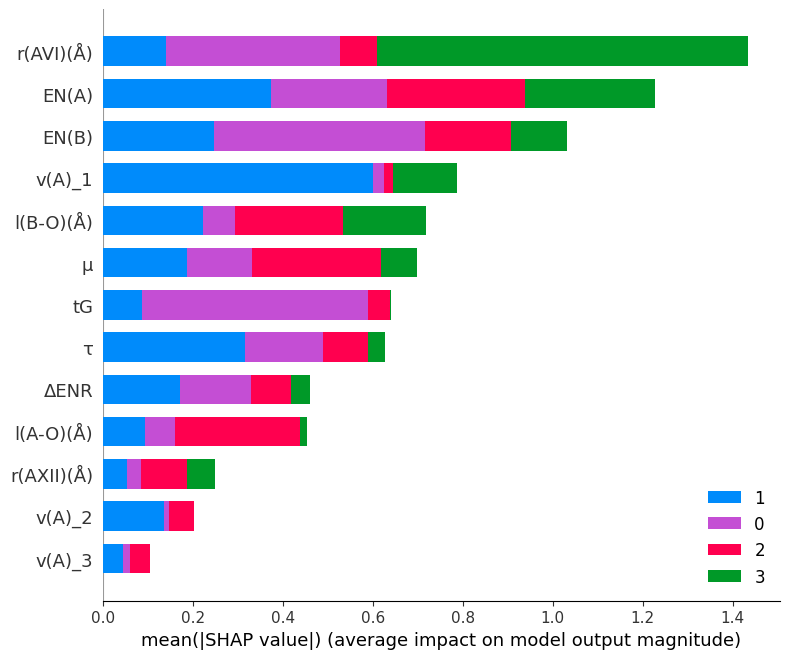

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 1200x600 with 0 Axes>

In [41]:
# SHAP Analysis
def shap_analysis(model, X_sample):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)
    
    plt.figure(figsize=(12,8))
    shap.summary_plot(shap_values, X_sample, plot_type="bar", class_names=model.classes_)
    plt.show()
    
    for i, class_name in enumerate(model.classes_):
        plt.figure(figsize=(12,6))
        shap.summary_plot(shap_values[i], X_sample, plot_type="dot", show=False)
        plt.title(f"SHAP Summary for {class_name}")
        plt.show()

shap_analysis(lgbm, X.sample(100, random_state=42))  # Use subset for speed